# Arima and Sessional Arima on champagne Sales Dataset

Auto Regressive Integrated Moving Analysis and Seasonal Auto Regressive Integrated Moving Analysis<br>

The general process for Arima is following:<br>
->Vizualize the time series data<br>
->Make the time series data Stationary<br>
->Plot the AutoCorrelation an PartialAutoCorrelation Charts<br>
->Construct the ARIMA or Sesional ARIMA model based on the data<br>
->Use the model to make predictions<br>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#Reading the Dataset
data=pd.read_csv('perrin-freres-monthly-champagne.csv',index_col='Month',parse_dates=True)
data.head()

,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1964-01,2815.0
1964-02,2672.0
1964-03,2755.0
1964-04,2721.0
1964-05,2946.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107 entries, 1964-01 to Perrin Freres monthly champagne sales millions ?64-?72
Data columns (total 1 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1)
memory usage: 1.7+ KB


In [16]:
#Changing the col name
data.columns=['Sales']

In [25]:
data.index=pd.to_datetime(data.index)

In [26]:
data.tail()

,Sales
Month,
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0
1972-08-01,1413.0
1972-09-01,5877.0


In [27]:
#dropping NaN values
data=data.dropna()

In [28]:
data.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


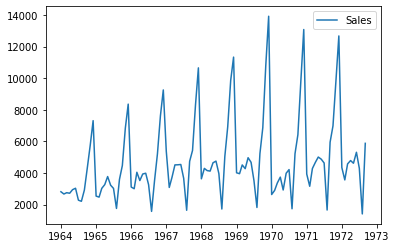

In [30]:
#Visualizing the original data
plt.plot(data,label='Sales')
plt.legend()

In [32]:
# Observation: This data looks seasional i.e.there is trend/pattern in data but its not specific to any period.

In [41]:
#Cheking of the data is Stationary using Dickey fuller
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(data['Sales'])
test_result

(-1.8335930563276237,
 0.3639157716602447,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [43]:
#H0: Accepting Null - its not stationary
#H1: Rejecting Null - Its Stationary
#Always model tried to prove that the data is not stationary
def adfuller_test(sales):
    results=adfuller(sales)
    labels=['ADF Test Statistic','p value','#Lags Used','# of Observations Used']
    for value,label in zip(results,labels):
        print(label, ':', value)
    if results[1]<=0.05:
        print('We reject the null hypothesis and data is stationary as the P value is less than 0.05 which is :',results[1])
    else:
        print('We failed to reject the null hypothesis and data is not stationary as the P value is greater than 0.05 which is :',results[1])

In [44]:
adfuller_test(data['Sales'])

ADF Test Statistic : -1.8335930563276237
p value : 0.3639157716602447
#Lags Used : 11
# of Observations Used : 93
We failed to reject the null hypothesis and data is not stationary as the P value is greater than 0.05 which is : 0.3639157716602447


In [45]:
#Trying to make the Data Stationary using differencing method
data['Seasonal First Difference']=data['Sales']-data['Sales'].shift(12) #We are shifting 12 as this is monthly data (for 1 yr 12 months)

In [46]:
data.head()

,Sales,Seasonal First Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN


In [49]:
data.dropna(inplace=True)

In [50]:
data.head()

,Sales,Seasonal First Difference
Month,,
1965-01-01,2541.0,-274.0
1965-02-01,2475.0,-197.0
1965-03-01,3031.0,276.0
1965-04-01,3266.0,545.0
1965-05-01,3776.0,830.0


In [51]:
#Again performing Dickey fuller to check if the data is stationary
adfuller_test(data['Seasonal First Difference'])

ADF Test Statistic : -7.626619157213163
p value : 2.060579696813685e-11
#Lags Used : 0
# of Observations Used : 92
We reject the null hypothesis and data is stationary as the P value is less than 0.05 which is : 2.060579696813685e-11


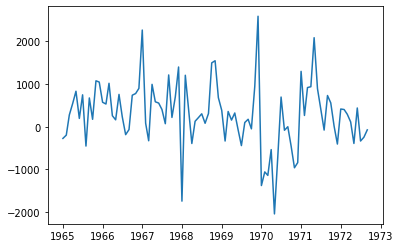

In [52]:
plt.plot(data['Seasonal First Difference'])

# Plotting AutoCorrelation (ACF) and PartialAutoCorrelation (PACF) Plots

In [68]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

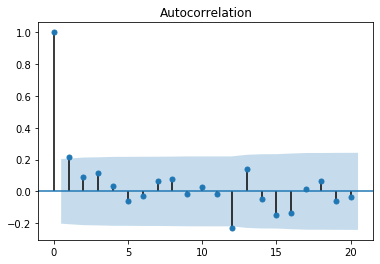

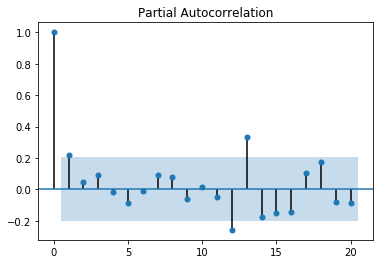

In [73]:
plot_acf(data['Seasonal First Difference']) # For MA model-this gives q value which will be used in ARIMA model
plt.show()
plot_pacf(data['Seasonal First Difference']) # For AR model-this gives P value which will be used in ARIMA model
plt.show()

In [75]:
#For non-seasonal data
# p=1 , d=1 , q=0/1
from statsmodels.tsa.arima_model import ARIMA

C:\Users\v-ankona\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\v-ankona\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


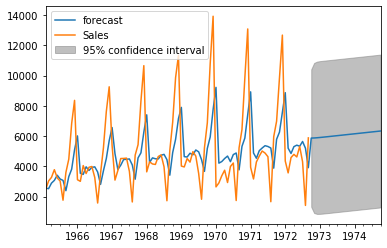

In [88]:
model=ARIMA(data['Sales'],order=(1,1,1))
results_ARIMA=model.fit(disp=-1)
results_ARIMA.plot_predict(1,117)
plt.show()

In [77]:
import statsmodels.api as sm

C:\Users\v-ankona\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\v-ankona\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


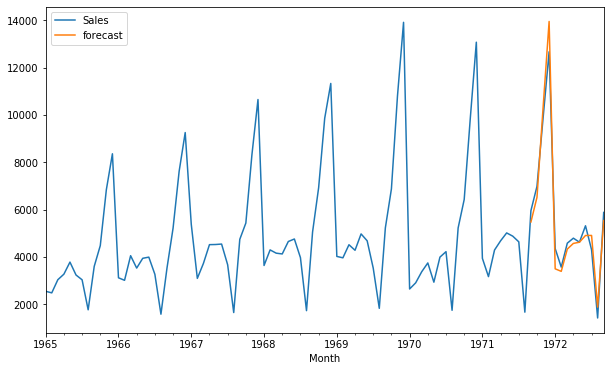

In [99]:
model=sm.tsa.statespace.SARIMAX(data['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
results_SARIMA=model.fit(disp=-1)
data['forecast']=results_SARIMA.predict(start=80,end=103,dynamic=True)
data[['Sales','forecast']].plot(figsize=(10,6))
plt.show()

In [102]:
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+DateOffset(months=x) for x in range(0,36)]
future_dates_df=pd.DataFrame(index=future_dates[1:],columns=data.columns)

In [103]:
future_dates_df

,Sales,Seasonal First Difference,forecast
1972-10-01,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN
1973-03-01,NaN,NaN,NaN
1973-04-01,NaN,NaN,NaN
1973-05-01,NaN,NaN,NaN
1973-06-01,NaN,NaN,NaN
1973-07-01,NaN,NaN,NaN


In [104]:
future_data=pd.concat([data,future_dates_df])

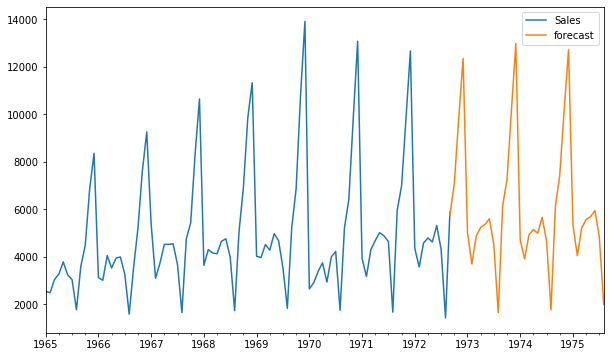

In [109]:
future_data['forecast']=results_SARIMA.predict(start=92,end=132,dynamic=True)
future_data[['Sales','forecast']].plot(figsize=(10,6))

In [110]:
results_SARIMA.forecast(steps=36)

1972-10-01     7155.177220
1972-11-01     9847.292212
1972-12-01    12378.564670
1973-01-01     5041.640561
1973-02-01     3710.750467
1973-03-01     4889.269239
1973-04-01     5248.286478
1973-05-01     5378.412738
1973-06-01     5617.972411
1973-07-01     4502.514062
1973-08-01     1653.344344
1973-09-01     6273.155150
1973-10-01     7338.881838
1973-11-01    10210.712081
1973-12-01    13020.794063
1974-01-01     4743.773422
1974-02-01     3936.203298
1974-03-01     4956.738633
1974-04-01     5174.363243
1974-05-01     5017.650665
1974-06-01     5691.597304
1974-07-01     4673.122463
1974-08-01     1789.706705
1974-09-01     6260.587714
1974-10-01     7529.383989
1974-11-01    10229.434862
1974-12-01    12773.018871
1975-01-01     5394.582566
1975-02-01     4086.800926
1975-03-01     5258.343565
1975-04-01     5611.117275
1975-05-01     5728.577479
1975-06-01     5987.318549
1975-07-01     4876.142739
1975-08-01     2025.460805
1975-09-01     6638.695259
Freq: MS, dtype: float64